# Results
- Models used with hyperparameters: Bagging with decision tree(best model), Pasting with decision tree (best_model), Random Forest, Ada Boost with SVC, Ada Boost with Decision tree, Gradient Boost, XG boost, Extra Trees Classifier, Voting Classifier, Stacking Classifier
- Best Model parameters: Voting Classifier - 5 best models - random forest, extra trees, gradient boost, XG boost, pasting with decision tree {'voting': 'hard'}
- Mean Cross validation score of Best model: Best Mean Cross Validation Score is 0.8466666666666667
- Test score of best model: Accuracy on test set: 0.8111111111111111
- Train score of best model: Accuracy on training set:Train score is 0.89
- Validation score of best model: Accuracy on validation set: Val score is 0.8308457711442786

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv(r'titanic.csv')

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# let's inspect the variable values

for var in data.columns:
    print(var, data[var].unique()[0:20], '\n')

PassengerId [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 

Survived [0 1] 

Pclass [3 1 2] 

Name ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima'] 

Sex ['male' 'female'] 

Age [22. 38. 26. 35. nan 54.  2. 27. 14.  4. 58. 20. 39. 55. 31. 34. 15. 28.
  8. 19.] 

SibSp [1 0 3 4 2 5 8] 

Parch [0 1 2 5 3 4 6] 

Ticket ['A/5 21171' 'PC 1

In [7]:
# make list of variables  types

# numerical: discrete vs continuous
discrete = [var for var in data.columns if data[var].dtype!='O' and var!='Survived' and data[var].nunique()<10]
continuous = [var for var in data.columns if data[var].dtype!='O' and var!='Survived' and var not in discrete]

# mixed
mixed = ['Cabin']

# categorical
categorical = [var for var in data.columns if data[var].dtype=='O' and var not in mixed]

print(f'There are {len(discrete)} discrete variables')
print(f'There are {len(continuous)} continuous variables')
print(f'There are {len(categorical)} categorical variables')
print(f'There are {len(mixed)} mixed variables')

There are 3 discrete variables
There are 3 continuous variables
There are 4 categorical variables
There are 1 mixed variables


In [8]:
# missing values
data.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [9]:
# cardinality (number of different categories)

data[categorical+mixed].nunique()

Name        891
Sex           2
Ticket      681
Embarked      3
Cabin       147
dtype: int64

In [10]:
# Cabin- mixed variable
# \d regular expression for digts . \d+ one or more digits
data['Cabin_num'] = data['Cabin'].str.extract('(\d+)') # captures numerical part
data['Cabin_num'] = data['Cabin_num'].astype('float')
data['Cabin_cat'] = data['Cabin'].str[0] # captures the first letter

# show dataframe
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_num,Cabin_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,85.0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,123.0,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,NaN


In [11]:
data['Title'] = data['Name'].str.split(',').str[1].str.split('\s+').str[1]
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_num,Cabin_cat,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,NaN,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,85.0,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,NaN,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,123.0,C,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,NaN,Mr.


In [12]:
data['Title'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Col.           2
Mlle.          2
Major.         2
Don.           1
Sir.           1
Mme.           1
Ms.            1
the            1
Lady.          1
Capt.          1
Jonkheer.      1
Name: Title, dtype: int64

In [13]:
data['Cabin_cat'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin_cat, dtype: int64

In [14]:
# drop original mixed
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_num,Cabin_cat,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,NaN,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,85.0,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,NaN,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,123.0,C,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,NaN,Mr.


In [15]:
data.drop(['PassengerId','Name','Ticket','Cabin'], axis=1,inplace=True)

In [16]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_num,Cabin_cat,Title
0,0,3,male,22.0,1,0,7.2500,S,NaN,NaN,Mr.
1,1,1,female,38.0,1,0,71.2833,C,85.0,C,Mrs.
2,1,3,female,26.0,0,0,7.9250,S,NaN,NaN,Miss.
3,1,1,female,35.0,1,0,53.1000,S,123.0,C,Mrs.
4,0,3,male,35.0,0,0,8.0500,S,NaN,NaN,Mr.


In [17]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin_num
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,200.00000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,50.49000
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,35.39497
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,2.00000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,22.00000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,43.00000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,77.25000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,148.00000


In [18]:
# separate into training and testing set
from sklearn.model_selection import train_test_split
X_trainval, X_test, y_trainval, y_test = train_test_split(
    data.drop('Survived', axis=1),  # predictors
    data['Survived'],  # target
    test_size=0.1,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=0)
X_train.shape, X_val.shape,X_test.shape




((600, 10), (201, 10), (90, 10))

In [19]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_num,Cabin_cat,Title
132,3,female,47.00,1,0,14.5000,S,NaN,NaN,Mrs.
224,1,male,38.00,1,0,90.0000,S,93.0,C,Mr.
381,3,female,1.00,0,2,15.7417,C,NaN,NaN,Miss.
831,2,male,0.83,1,1,18.7500,S,NaN,NaN,Master.
558,1,female,39.00,1,1,79.6500,S,67.0,E,Mrs.


In [20]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 132 to 201
Data columns (total 10 columns):
Pclass       600 non-null int64
Sex          600 non-null object
Age          485 non-null float64
SibSp        600 non-null int64
Parch        600 non-null int64
Fare         600 non-null float64
Embarked     599 non-null object
Cabin_num    130 non-null float64
Cabin_cat    130 non-null object
Title        600 non-null object
dtypes: float64(3), int64(3), object(4)
memory usage: 51.6+ KB


In [21]:
# from feature-engine
from feature_engine import missing_data_imputers as mdi
# for one hot encoding with feature-engine
from feature_engine.categorical_encoders import OneHotCategoricalEncoder
from feature_engine.categorical_encoders import RareLabelCategoricalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [22]:
titanic_pipe = Pipeline([

    # missing data imputation 
    ('imputer_num_arbit',
     mdi.ArbitraryNumberImputer(arbitrary_number=-1,
                                variables=['Cabin_num'])),
    ('imputer_num_mean',
     mdi.MeanMedianImputer(imputation_method='mean',variables=['Age'])),
    
    ('imputer_cat_freq',
     mdi.FrequentCategoryImputer(variables=['Embarked'])),
    
    ('imputer_cat_missing',
     mdi.CategoricalVariableImputer(variables=['Cabin_cat','Title'])),

    # categorical encoding 
    ('encoder_rare_label',
     RareLabelCategoricalEncoder(tol=0.01,
                                    n_categories=4,
                                    variables=['Cabin_cat','Title'])),
    ('categorical_encoder',
     OneHotCategoricalEncoder( top_categories=None,
                               variables=['Sex', 'Embarked','Cabin_cat','Title'], # we can select which variables to encode
                               drop_last=True)),

])

In [23]:
titanic_pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('imputer_num_arbit',
                 ArbitraryNumberImputer(arbitrary_number=-1,
                                        variables=['Cabin_num'])),
                ('imputer_num_mean',
                 MeanMedianImputer(imputation_method='mean',
                                   variables=['Age'])),
                ('imputer_cat_freq',
                 FrequentCategoryImputer(variables=['Embarked'])),
                ('imputer_cat_missing',
                 CategoricalVariableImputer(variables=['Cabin_cat', 'Title'])),
                ('encoder_rare_label',
                 RareLabelCategoricalEncoder(n_categories=4, tol=0.01,
                                             variables=['Cabin_cat', 'Title'])),
                ('categorical_encoder',
                 OneHotCategoricalEncoder(drop_last=True, top_categories=None,
                                          variables=['Sex', 'Embarked',
                                                    

In [24]:
# Apply Transformations
X_train=titanic_pipe.transform(X_train)
X_val=titanic_pipe.transform(X_val)
X_test=titanic_pipe.transform(X_test)

## <span class="mark">DO NOT CHANGE STEPS BEFORE THIS POINT</span>

In [39]:
# Train a logistic regression model, report the coefficients and model performance 

# YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

for i in [0.001, 0.01, 0.1,0.6, 1, 10, 100, 1000]:
    clf = LogisticRegression(C=i).fit(X_train, y_train)
    cv_scores = cross_val_score(clf, X_train, y_train)
    print(i,cv_scores.mean())


clf_1 = LogisticRegression(C=1).fit(X_train, y_train)
cv_scores_1 = cross_val_score(clf_1, X_train, y_train)
print("Mean Cross-validation scores: {}".format(cv_scores_1.mean()))
print("Logistic Performance on train dataset: ", clf_1.score(X_train,y_train))
print("Logistic Performance on test dataset: ", clf_1.score(X_test,y_test))
print("Logistic Performance on validation dataset: ", clf_1.score(X_val,y_val))


0.001 0.6816666666666666
0.01 0.7433333333333334
0.1 0.8066666666666666
0.6 0.7983333333333332
1 0.8
10 0.8016666666666667
100 0.8016666666666667
1000 0.8
Mean Cross-validation scores: 0.8
Logistic Performance on train dataset:  0.8233333333333334
Logistic Performance on test dataset:  0.8555555555555555
Logistic Performance on validation dataset:  0.845771144278607


In [40]:
# Train a KNN model, report the coefficients, the best parameters, and model performance 
# hint: find the optimal k

# YOUR CODE HERE

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

# define a list of parameters

param_knn = {'n_neighbors': range(5,25)}

#apply grid search
grid_knn = GridSearchCV(knn, param_knn, cv=10, return_train_score=True, scoring='accuracy')
grid_knn.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_knn.best_score_))
print()

#find best parameters
print('KNN parameters: ', grid_knn.best_params_)

# Check test data set performance
print("KNN Train Performance: ", grid_knn.score(X_train,y_train))
print("KNN Test Performance: ", grid_knn.score(X_test,y_test))
print("KNN Validation Performance: ", grid_knn.score(X_val,y_val))

Best Mean Cross-validation score: 0.71

KNN parameters:  {'n_neighbors': 5}
KNN Train Performance:  0.8033333333333333
KNN Test Performance:  0.7888888888888889
KNN Validation Performance:  0.6915422885572139


In [41]:
# Train a Decision Tree model, report the coefficients, the best parameters, and model performance (10 points)
# hint: find the optimal max_depth

# YOUR CODE HERE
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)

#define a list of parameters
param_dtree = {'max_depth': range(1,20)}

#apply grid search
grid_dtree = GridSearchCV(dtree, param_dtree, cv=10, return_train_score = True, scoring='accuracy')
grid_dtree.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_dtree.best_score_))
print()

#find best parameters
print('Decision Tree parameters: ', grid_dtree.best_params_)

# Check test data set performance
print("Decision Tree Train Performance: ", grid_dtree.score(X_train,y_train))
print("Decision Tree Test Performance: ", grid_dtree.score(X_test,y_test))
print("Decision Tree Validation Performance: ", grid_dtree.score(X_val,y_val))

Best Mean Cross-validation score: 0.82

Decision Tree parameters:  {'max_depth': 7}
Decision Tree Train Performance:  0.8966666666666666
Decision Tree Test Performance:  0.7888888888888889
Decision Tree Validation Performance:  0.8507462686567164


In [42]:
#SVC

%matplotlib inline

#from mlxtend.plotting import plot_decision_regions
from sklearn.svm import LinearSVC

clf_svc = LinearSVC()
clf_svc.fit(X_train,y_train)
cv_scores_svc = cross_val_score(clf_svc, X_train, y_train)
print("Mean Cross-validation scores: {}".format(cv_scores_svc.mean()))
print("SVC Train Performance: ", clf_svc.score(X_train,y_train))
print("SVC Test Performance: ", clf_svc.score(X_test,y_test))
print("SVC Validation Performance: ", clf_svc.score(X_val,y_val))

Mean Cross-validation scores: 0.7633333333333334
SVC Train Performance:  0.82
SVC Test Performance:  0.7888888888888889
SVC Validation Performance:  0.8407960199004975


In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

svc_kernel = SVC(kernel = 'rbf', probability=True)

#define a list of parameters
param_svc_kernel = {'C': [1,10,100,1000,10000],'gamma':[0.001,0.001,0.1,1,10]}

#apply grid search
grid_svc_kernel = GridSearchCV(svc_kernel, param_svc_kernel, cv=5, n_jobs=2, scoring='accuracy')
grid_svc_kernel.fit(X_train, y_train)

print('train score: ', grid_svc_kernel.score(X_train, y_train))
print('test score: ', grid_svc_kernel.score(X_test, y_test))
print('val score: ', grid_svc_kernel.score(X_val, y_val))
print(grid_svc_kernel.best_params_)
print('Mean Cross Validation Score:', grid_svc_kernel.best_score_)

train score:  0.8933333333333333
test score:  0.8
val score:  0.8159203980099502
{'C': 1000, 'gamma': 0.001}
Mean Cross Validation Score: 0.7666666666666667


In [44]:
#linear Kernel SVC

svc_kernel_linear = SVC(kernel = 'linear', probability=True)

#define a list of parameters
param_svc_kernel_linear = {'C': [0.001, 0.01,0.03,0.05, 0.1, 1, 10]}

#apply grid search
grid_svc_kernel_linear = GridSearchCV(svc_kernel_linear, param_svc_kernel_linear, cv=10, scoring='accuracy')
grid_svc_kernel_linear.fit(X_train, y_train)

print('train score: ', grid_svc_kernel_linear.score(X_train, y_train))
print('test score: ', grid_svc_kernel_linear.score(X_test, y_test))
print('Validation score: ', grid_svc_kernel_linear.score(X_val, y_val))
print(grid_svc_kernel_linear.best_params_)
print('Mean CV Score:',grid_svc_kernel_linear.best_score_)

train score:  0.8233333333333334
test score:  0.8333333333333334
Validation score:  0.8557213930348259
{'C': 10}
Mean CV Score: 0.8150000000000001


In [45]:
#Sigmoid

svc_kernel_sig = SVC(kernel = 'sigmoid',probability=True)

#define a list of parameters
param_svc_kernel_sig = {'C': [0.001, 0.01,0.03,0.05, 0.1, 1, 10],'gamma':[0.001,0.001,0.1,1,10]}

#apply grid search
grid_svc_kernel_sig = GridSearchCV(svc_kernel_sig, param_svc_kernel_sig, cv=10, scoring='accuracy')
grid_svc_kernel_sig.fit(X_train, y_train)

print('train score: ', grid_svc_kernel_sig.score(X_train, y_train))
print('test score: ', grid_svc_kernel_sig.score(X_test, y_test))
print('Validation score: ', grid_svc_kernel_sig.score(X_val, y_val))
print(grid_svc_kernel_sig.best_params_)
print('Mean CV Score:',grid_svc_kernel_sig.best_score_)

train score:  0.6333333333333333
test score:  0.5777777777777777
Validation score:  0.6368159203980099
{'C': 0.05, 'gamma': 0.001}
Mean CV Score: 0.6316666666666666


In [46]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier
opt_tree = DecisionTreeClassifier(random_state = 0)
param_DT = {"max_depth": range(1,5),
           "min_samples_split": range(2,9,1),
           "max_leaf_nodes": range(2,12)}

grid_tree = GridSearchCV(opt_tree,param_DT,cv=10, scoring='accuracy')
grid_tree.fit(X_train,y_train)
print(grid_tree.best_params_)
print("CV Score: {:.4f}".format(grid_tree.best_score_))
print("Accuracy on training set: {:.3f}".format(grid_tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(grid_tree.score(X_test, y_test)))
print("Accuracy on validation set: {:.3f}".format(grid_tree.score(X_val, y_val)))

{'max_depth': 3, 'max_leaf_nodes': 6, 'min_samples_split': 2}
CV Score: 0.8233
Accuracy on training set: 0.825
Accuracy on test set: 0.811
Accuracy on validation set: 0.831


In [47]:
#logistic Regression

logreg=LogisticRegression(max_iter=1000)

logreg_param= {'C': [0.001,0.01,0.1,1,10,100], 'penalty': ['l1','l2']}
logreg_grid = GridSearchCV(logreg, logreg_param,cv=5, return_train_score=True, )
logreg_grid.fit(X_train,y_train)
print(f'Best Mean Cross Validation Score is {logreg_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {logreg_grid.best_params_}')
print(f'Train score is {logreg_grid.score(X_train,y_train)}')
print(f'Test score is {logreg_grid.score(X_test,y_test)}')
print(f'Val score is {logreg_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.8133333333333332
Best Mean Cross Validation Score is {'C': 10, 'penalty': 'l2'}
Train score is 0.83
Test score is 0.8444444444444444
Val score is 0.835820895522388


In [48]:
#linear svc

lsvc=SVC(kernel='linear',probability=True)
lsvc_param= {'C': [0.001,0.01,0.1,1,10,100],}
lsvc_grid = GridSearchCV(lsvc, lsvc_param,cv=5, return_train_score=True, )
lsvc_grid.fit(X_train,y_train)
print(f'Best Mean Cross Validation Score is {lsvc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {lsvc_grid.best_params_}')
print(f'Train score is {lsvc_grid.score(X_train,y_train)}')
print(f'Test score is {lsvc_grid.score(X_test,y_test)}')
print(f'Val score is {lsvc_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.8133333333333332
Best Mean Cross Validation Score is {'C': 1}
Train score is 0.8216666666666667
Test score is 0.8333333333333334
Val score is 0.8557213930348259


### HW3

In [49]:
#importing bagging regressor
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from  sklearn.ensemble import ExtraTreesClassifier

In [50]:
model_bag_best = Pipeline([("bag_reg", BaggingClassifier(DecisionTreeClassifier (max_depth= 4, max_leaf_nodes=11, min_samples_split=2), random_state=0, bootstrap=True, oob_score=True))])
model_pasting_best = Pipeline([("bag_reg", BaggingClassifier(DecisionTreeClassifier (max_depth= 4, max_leaf_nodes=11, min_samples_split=2), random_state=0,bootstrap=False, oob_score=False))])
model_random_forest = Pipeline([("random_forest", RandomForestClassifier(n_jobs=-1, random_state=0))])

In [51]:
model_ada_dt = AdaBoostClassifier(DecisionTreeClassifier (max_depth= 4, max_leaf_nodes=11, min_samples_split=2),random_state=0)
model_ada_svr = AdaBoostClassifier(SVC(kernel='linear',C=10),random_state=0, algorithm='SAMME')
model_gbr = GradientBoostingClassifier()
model_xgboost = XGBClassifier()
model_etc= ExtraTreesClassifier(random_state=42)

In [53]:
bag_best_params = [
   {
    'bag_reg__n_estimators':[50,100,200,300] , 
    'bag_reg__max_samples' :[100,200]
   }
]

random_forest_params = [
    {
        'random_forest__n_estimators': [200,300,400],
        'random_forest__max_leaf_nodes': [10,15,30],
        'random_forest__max_features': ['auto', 'sqrt', 'log2'],
        'random_forest__max_depth': [2,4,5,7],
        'random_forest__criterion': ['gini','entropy']
    }
]

ada_boost_params = [
    {
        'n_estimators': [50, 100,200,300],
        'learning_rate': [0.1,0.5,0.8,1,10]
    }
]

gbr_params = [
    {
        'max_depth': [2,4,6],
        'n_estimators': [50,100,200,400],
        'learning_rate': [0.01,0.1,1,10]
    }
]

xgboost_params = [
    {
        'learning_rate': [0.01,0.05,0.08,0.1],
        'max_depth': [3,4,5,6,7],
        'n_estimators': [25,35,45,50],
        'min_child_weight' : [1,3,5],
         'subsample':[0.2,0.4,0.6]
    }
]

etc_params = [
    { 
    'n_estimators': [100,200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}]

In [54]:
#Bagging for best model - decision tree

grid_search_bag = GridSearchCV(model_bag_best,bag_best_params, cv=5,scoring='accuracy')
grid_search_bag.fit(X_train,y_train)

#best cv score, best parameters, MSE train
print(grid_search_bag.best_params_)
print("CV Score: {:.4f}".format(grid_search_bag.best_score_))
print("Accuracy on training set: {:.3f}".format(grid_search_bag.score(X_train, y_train)))
print("Accuracy on validation set: {:.3f}".format(grid_search_bag.score(X_val, y_val)))
print("Accuracy on test set: {:.3f}".format(grid_search_bag.score(X_test, y_test)))

{'bag_reg__max_samples': 100, 'bag_reg__n_estimators': 50}
CV Score: 0.8217
Accuracy on training set: 0.847
Accuracy on validation set: 0.831
Accuracy on test set: 0.800


In [55]:
#Pasting for best model - decision tree

grid_search_pasting = GridSearchCV(model_pasting_best,bag_best_params, cv=5,scoring='accuracy')
grid_search_pasting.fit(X_train,y_train)

#best cv score, best parameters, MSE train
print(grid_search_pasting.best_params_)
print("CV Score: {:.4f}".format(grid_search_pasting.best_score_))
print("Accuracy on training set: {:.3f}".format(grid_search_pasting.score(X_train, y_train)))
print("Accuracy on validation set: {:.3f}".format(grid_search_pasting.score(X_val, y_val)))
print("Accuracy on test set: {:.3f}".format(grid_search_pasting.score(X_test, y_test)))

{'bag_reg__max_samples': 100, 'bag_reg__n_estimators': 50}
CV Score: 0.8250
Accuracy on training set: 0.855
Accuracy on validation set: 0.801
Accuracy on test set: 0.778


In [56]:
#Random Forest Classifier

grid_search_rf = GridSearchCV(model_random_forest,random_forest_params, cv=5,scoring='accuracy')
grid_search_rf.fit(X_train,y_train)

#best cv score, best parameters, MSE train
print(grid_search_rf.best_params_)
print("CV Score: {:4f}".format(grid_search_rf.best_score_))
print("Accuracy on training set: {:.3f}".format(grid_search_rf.score(X_train, y_train)))
print("Accuracy on validation set: {:.3f}".format(grid_search_rf.score(X_val, y_val)))
print("Accuracy on test set: {:.3f}".format(grid_search_rf.score(X_test, y_test)))

{'random_forest__criterion': 'gini', 'random_forest__max_depth': 7, 'random_forest__max_features': 'auto', 'random_forest__max_leaf_nodes': 30, 'random_forest__n_estimators': 400}
CV Score: 0.843333
Accuracy on training set: 0.885
Accuracy on validation set: 0.841
Accuracy on test set: 0.811


In [57]:
#Ada Boost - Decision Tree Classifier

grid_search_ada_dt = GridSearchCV(model_ada_dt,ada_boost_params, cv=5,scoring='accuracy')
grid_search_ada_dt.fit(X_train,y_train)

#best cv score, best parameters, MSE train
print(grid_search_ada_dt.best_params_)
print("CV Score: {:.2f}".format(grid_search_ada_dt.best_score_))
print("Accuracy on training set: {:.3f}".format(grid_search_ada_dt.score(X_train, y_train)))
print("Accuracy on validation set: {:.3f}".format(grid_search_ada_dt.score(X_val, y_val)))
print("Accuracy on test set: {:.3f}".format(grid_search_ada_dt.score(X_test, y_test)))

{'learning_rate': 0.1, 'n_estimators': 50}
CV Score: 0.82
Accuracy on training set: 0.963
Accuracy on validation set: 0.806
Accuracy on test set: 0.767


In [58]:
#Ada Boost - SVClassifier

import warnings
warnings.filterwarnings("ignore")

grid_search_ada_svc = GridSearchCV(model_ada_svr,ada_boost_params, cv=5,scoring='accuracy')
grid_search_ada_svc.fit(X_train,y_train)

#best cv score, best parameters, MSE train
print(grid_search_ada_svc.best_params_)
print("CV Score: {:.2f}".format(grid_search_ada_svc.best_score_))
print("Accuracy on training set: {:.3f}".format(grid_search_ada_svc.score(X_train, y_train)))
print("Accuracy on validation set: {:.3f}".format(grid_search_ada_svc.score(X_val, y_val)))
print("Accuracy on test set: {:.3f}".format(grid_search_ada_svc.score(X_test, y_test)))

{'learning_rate': 0.1, 'n_estimators': 50}
CV Score: 0.80
Accuracy on training set: 0.820
Accuracy on validation set: 0.836
Accuracy on test set: 0.822


In [59]:
#Gradient Boost Classifier

grid_search_gbr = GridSearchCV(model_gbr,gbr_params, cv=5,scoring='accuracy')
grid_search_gbr.fit(X_train,y_train)

#best cv score, best parameters, MSE train
print(grid_search_gbr.best_params_)
print("CV Score: {:.4f}".format(grid_search_gbr.best_score_))
print("Accuracy on training set: {:.3f}".format(grid_search_gbr.score(X_train, y_train)))
print("Accuracy on validation set: {:.3f}".format(grid_search_gbr.score(X_val, y_val)))
print("Accuracy on test set: {:.3f}".format(grid_search_gbr.score(X_test, y_test)))

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50}
CV Score: 0.8317
Accuracy on training set: 0.927
Accuracy on validation set: 0.846
Accuracy on test set: 0.822


In [60]:
#XG Boost Classifier

grid_search_xgc = GridSearchCV(model_xgboost,xgboost_params, cv=5,scoring='accuracy')
grid_search_xgc.fit(X_train,y_train)

#best cv score, best parameters, MSE train
print(grid_search_xgc.best_params_)
print("CV Score: {:.4f}".format(grid_search_xgc.best_score_))
print("Accuracy on training set: {:.3f}".format(grid_search_xgc.score(X_train, y_train)))
print("Accuracy on validation set: {:.3f}".format(grid_search_xgc.score(X_val, y_val)))
print("Accuracy on test set: {:.3f}".format(grid_search_xgc.score(X_test, y_test)))

{'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 0.6}
CV Score: 0.8367
Accuracy on training set: 0.902
Accuracy on validation set: 0.841
Accuracy on test set: 0.844


In [61]:
#Extra Tree Classifier

grid_search_etc = GridSearchCV(model_etc,etc_params, cv=5,scoring='accuracy',return_train_score=True)
grid_search_etc.fit(X_train,y_train)

#best cv score, best parameters, MSE train
print(grid_search_etc.best_params_)
print("CV Score: {:.4f}".format(grid_search_etc.best_score_))
print("Accuracy on training set: {:.3f}".format(grid_search_etc.score(X_train, y_train)))
print("Accuracy on validation set: {:.3f}".format(grid_search_etc.score(X_val, y_val)))
print("Accuracy on test set: {:.3f}".format(grid_search_etc.score(X_test, y_test)))

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}
CV Score: 0.8417
Accuracy on training set: 0.895
Accuracy on validation set: 0.846
Accuracy on test set: 0.800


### Correlation Matrix

In [62]:
classifiers={'knn':grid_knn ,
             'logreg':logreg_grid,
             'lsvc':lsvc_grid,
             'klinearsvc': grid_svc_kernel_linear,
             'dtree':grid_tree,
             'bag_dtree':grid_search_bag,
             'paste_dtree':grid_search_pasting,
             'rfc': grid_search_rf,
             'etc': grid_search_etc,
             'adc_dtree':grid_search_ada_dt,
             'ada_svc': grid_search_ada_svc,
             'gbc': grid_search_gbr,
             'xgbc': grid_search_xgc}

In [63]:
classifiers.keys()

dict_keys(['knn', 'logreg', 'lsvc', 'klinearsvc', 'dtree', 'bag_dtree', 'paste_dtree', 'rfc', 'etc', 'adc_dtree', 'ada_svc', 'gbc', 'xgbc'])

In [64]:
results_mean_std = []
for  key, value in classifiers.items():
    mean = value.cv_results_['mean_test_score'][value.best_index_]
    std=value.cv_results_['std_test_score'][value.best_index_]
     
    results_mean_std.append({
        "model": key,
        "mean": mean,
        "std": std
    })

In [65]:
# Create a Pandas DataFrame with the mean+std results
accuracy_df = pd.DataFrame(results_mean_std, columns=['model', 'mean', 'std'])


In [66]:
# Show the accuracy dataframe

accuracy_df.sort_values(by=['mean'], inplace=True,ascending=False)
accuracy_df

,model,mean,std
7,rfc,0.843333,0.016997
8,etc,0.841667,0.025276
12,xgbc,0.836667,0.014530
11,gbc,0.831667,0.019293
6,paste_dtree,0.825000,0.022973
4,dtree,0.823333,0.038152
9,adc_dtree,0.823333,0.046963
5,bag_dtree,0.821667,0.021473
3,klinearsvc,0.815000,0.032872
1,logreg,0.813333,0.021473


In [67]:
# Create a prediction of all models on the test set
predictions_all = {}
for  key, value in classifiers.items():
    # Get best estimator
    best_model = value.best_estimator_
    
    # Predict test labels
    predictions = best_model.predict(X_val)
    
    # Save predictions to a list
    predictions_all[key] = predictions

In [68]:
# Creat a DataFrame for the predictions
pred = pd.DataFrame(predictions_all)

Text(0.5, 1, 'Correlation of the test set label prediction between models')

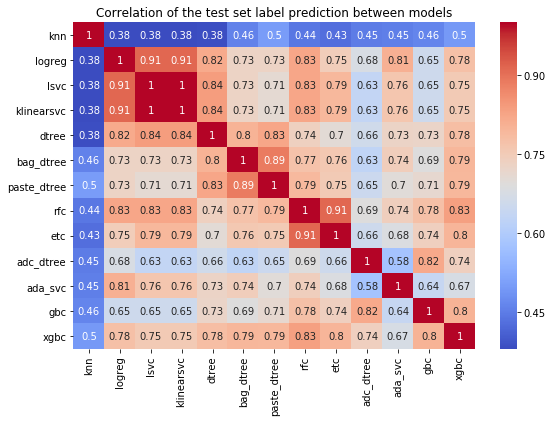

In [69]:
# Plot a heatmap of all correlations for easier visualization
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,6))
g = sns.heatmap(pred.corr(), annot=True, cmap='coolwarm', ax=ax)
g.set_title('Correlation of the test set label prediction between models')

In [70]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=True)
    return au_corr[0:n]



In [71]:
print("Least Absolute Correlations")
print(get_top_abs_correlations(pred, 5))

Least Absolute Correlations
knn  logreg        0.380557
     lsvc          0.380557
     klinearsvc    0.380557
     dtree         0.383531
     etc           0.429734
dtype: float64


In [73]:
from sklearn.ensemble import VotingClassifier

In [74]:
#voting classifier for Top 5 models

vclf1 = VotingClassifier(estimators=
                              [('rfc', grid_search_rf.best_estimator_), 
                               ('etc', grid_search_etc.best_estimator_), 
                               ('gbc', grid_search_gbr.best_estimator_),
                               ('xgbc', grid_search_xgc.best_estimator_),
                               ('paste_dtree', grid_search_pasting.best_estimator_)
                              ], )
vclf1_param = {
              'voting' : ['hard','soft'],
             }
vclf1_grid = GridSearchCV(vclf1, vclf1_param,cv=5, return_train_score=True, )
vclf1_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=VotingClassifier(estimators=[('rfc',
                                                     Pipeline(memory=None,
                                                              steps=[('random_forest',
                                                                      RandomForestClassifier(bootstrap=True,
                                                                                             ccp_alpha=0.0,
                                                                                             class_weight=None,
                                                                                             criterion='gini',
                                                                                             max_depth=7,
                                                                                             max_features='auto',
                                                                                  

In [75]:
print(f'Best Mean Cross Validation Score is {vclf1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {vclf1_grid.best_params_}')
print(f'Train score is {vclf1_grid.score(X_train,y_train)}')
print(f'Test score is {vclf1_grid.score(X_test,y_test)}')
print(f'Val score is {vclf1_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.8466666666666667
Best Mean Cross Validation Score is {'voting': 'hard'}
Train score is 0.89
Test score is 0.8111111111111111
Val score is 0.8308457711442786


In [76]:
# voting classifier for least 5 correlated models

vclf_least = VotingClassifier(estimators=
                              [('knn', grid_knn.best_estimator_), 
                               ('logreg', logreg_grid.best_estimator_),
                               ('lsvc', lsvc_grid.best_estimator_),
                               ('klinearsvc', grid_svc_kernel_linear.best_estimator_),
                               ('dtree', grid_tree.best_estimator_),
                               ('etc', grid_search_etc.best_estimator_)
                              ], )
vclf_least_param = {
              'voting' : ['hard','soft'],
             }
vclf_least_grid = GridSearchCV(vclf_least, vclf_least_param,cv=5, return_train_score=True, )
vclf_least_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=VotingClassifier(estimators=[('knn',
                                                     KNeighborsClassifier(algorithm='auto',
                                                                          leaf_size=30,
                                                                          metric='minkowski',
                                                                          metric_params=None,
                                                                          n_jobs=None,
                                                                          n_neighbors=5,
                                                                          p=2,
                                                                          weights='uniform')),
                                                    ('logreg',
                                                     LogisticRegression(C=10,
                                             

In [77]:
print(f'Best Mean Cross Validation Score is {vclf_least_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {vclf_least_grid.best_params_}')
print(f'Train score is {vclf_least_grid.score(X_train,y_train)}')
print(f'Test score is {vclf_least_grid.score(X_test,y_test)}')
print(f'Val score is {vclf_least_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.8283333333333334
Best Mean Cross Validation Score is {'voting': 'hard'}
Train score is 0.8366666666666667
Test score is 0.8555555555555555
Val score is 0.8606965174129353


In [78]:
from sklearn.ensemble import StackingClassifier

In [79]:
#Stacking Top 5
sclf1 = StackingClassifier(estimators=
                              [('rfc', grid_search_rf.best_estimator_), 
                               ('etc', grid_search_etc.best_estimator_), 
                               ('gbc', grid_search_gbr.best_estimator_),
                               ('xgbc', grid_search_xgc.best_estimator_),
                               ('paste_dtree', grid_search_pasting.best_estimator_)
                              ], final_estimator=LogisticRegression())
sclf1_param = {
              'final_estimator__C' : [0.1,0.2],
              'stack_method':['auto', 'predict_proba']
             }
sclf1_grid = GridSearchCV(sclf1, sclf1_param,cv=5, return_train_score=True, )
sclf1_grid.fit(X_train,y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=StackingClassifier(cv=None,
                                          estimators=[('rfc',
                                                       Pipeline(memory=None,
                                                                steps=[('random_forest',
                                                                        RandomForestClassifier(bootstrap=True,
                                                                                               ccp_alpha=0.0,
                                                                                               class_weight=None,
                                                                                               criterion='gini',
                                                                                               max_depth=7,
                                                                                               max_features='auto',
             

In [80]:
print(f'Best Mean Cross Validation Score is {sclf1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {sclf1_grid.best_params_}')
print(f'Train score is {sclf1_grid.score(X_train,y_train)}')
print(f'Test score is {sclf1_grid.score(X_test,y_test)}')
print(f'Val score is {sclf1_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.8416666666666666
Best Mean Cross Validation Score is {'final_estimator__C': 0.2, 'stack_method': 'auto'}
Train score is 0.8983333333333333
Test score is 0.8111111111111111
Val score is 0.845771144278607


In [81]:
#Stacking Least 5 Correlated

sclf2 = StackingClassifier(estimators=
                              [('knn', grid_knn.best_estimator_), 
                               ('logreg', logreg_grid.best_estimator_),
                               ('lsvc', lsvc_grid.best_estimator_),
                               ('klinearsvc', grid_svc_kernel_linear.best_estimator_),
                               ('dtree', grid_tree.best_estimator_),
                               ('etc', grid_search_etc.best_estimator_)
                              ],final_estimator=LogisticRegression())

#final_estimator=XGBClassifier(random_state=42,early_stopping_rounds=2,objective= 'binary:logistic'))
sclf2_param = {
              'final_estimator__C' : [0.1,0.2],
              'stack_method':['auto', 'predict_proba']
             }

'''sclf2_param = {
              'final_estimator__max_depth' : [2,6],
              'final_estimator__n_estimators' : [50,150],
              'final_estimator__learning_rate' : [0.1,0.6,0.8],
              'final_estimator__min_child_weight' : [1,3,7],
              'final_estimator__subsample':[0.6,0.9,1],
              'stack_method':['auto', 'predict_proba']
             } ''' 
sclf2_grid = GridSearchCV(sclf2, sclf2_param,cv=5, return_train_score=True, )
sclf2_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=StackingClassifier(cv=None,
                                          estimators=[('knn',
                                                       KNeighborsClassifier(algorithm='auto',
                                                                            leaf_size=30,
                                                                            metric='minkowski',
                                                                            metric_params=None,
                                                                            n_jobs=None,
                                                                            n_neighbors=5,
                                                                            p=2,
                                                                            weights='uniform')),
                                                      ('logreg',
                                                    

In [82]:
print(f'Best Mean Cross Validation Score is {sclf2_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {sclf2_grid.best_params_}')
print(f'Train score is {sclf2_grid.score(X_train,y_train)}')
print(f'Test score is {sclf2_grid.score(X_test,y_test)}')
print(f'Val score is {sclf2_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.8299999999999998
Best Mean Cross Validation Score is {'final_estimator__C': 0.1, 'stack_method': 'auto'}
Train score is 0.85
Test score is 0.8333333333333334
Val score is 0.8557213930348259


In [83]:
#Stacking Least 3 Correlated

sclf3 = StackingClassifier(estimators=
                              [('knn', grid_knn.best_estimator_), 
                               ('ada_svc', grid_search_ada_svc.best_estimator_), 
                               ('logreg', logreg_grid.best_estimator_),
                              ], final_estimator=
                           XGBClassifier(random_state=42,early_stopping_rounds=2,objective= 'binary:logistic'))
sclf3_param = {
              'final_estimator__max_depth' : [2,6],
              'final_estimator__n_estimators' : [50,150],
              'final_estimator__learning_rate' : [0.1,0.6],
              'final_estimator__min_child_weight' : [1,3],
              'final_estimator__subsample':[0.6,0.9],
              'stack_method':['auto', 'predict_proba']
             }
sclf3_grid = GridSearchCV(sclf3, sclf3_param,cv=5, return_train_score=True, )
sclf3_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=StackingClassifier(cv=None,
                                          estimators=[('knn',
                                                       KNeighborsClassifier(algorithm='auto',
                                                                            leaf_size=30,
                                                                            metric='minkowski',
                                                                            metric_params=None,
                                                                            n_jobs=None,
                                                                            n_neighbors=5,
                                                                            p=2,
                                                                            weights='uniform')),
                                                      ('ada_svc',
                                                   

In [84]:
print(f'Best Mean Cross Validation Score is {sclf3_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {sclf3_grid.best_params_}')
print(f'Train score is {sclf3_grid.score(X_train,y_train)}')
print(f'Test score is {sclf3_grid.score(X_test,y_test)}')
print(f'Val score is {sclf3_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.8116666666666668
Best Mean Cross Validation Score is {'final_estimator__learning_rate': 0.1, 'final_estimator__max_depth': 2, 'final_estimator__min_child_weight': 1, 'final_estimator__n_estimators': 50, 'final_estimator__subsample': 0.6, 'stack_method': 'auto'}
Train score is 0.8533333333333334
Test score is 0.8444444444444444
Val score is 0.8507462686567164
